To start using FREDS, First import FREDS' GA suite and the sensitivity profiles you have to work on

In [1]:
from FREDS import FREDS
from sensitivity import GPTSensitivity, XGPTSensitivity

A notation dictionary has to be generated to link between the .m file notation of the different perturbation and their MT format


In [2]:
notation_dict = {"total xs":"MT1", "ela scatt xs":"MT2",
                 "fission xs": "MT18",  "capture xs":"MT102"}

1. EXAMPLE WITH A GPT SENSITIVITY VECTOR -MINIMIZING ONLY A FITNESS FUNCTION - SINGLE-OBJECTIVE CASE

In [3]:
# 1. Extracting the information on the sensitivity
sensitivity = GPTSensitivity( filepath        = "GPT/main_sens0.m",
                              observable      = "keff",
                              zai             = 922380,
                              perts           = ["MT2", "MT18", "MT102"],
                              notation_dict   = notation_dict)


In [23]:

# 2. Now, let's set the problem context
FREDS.SetProblem(
    n_groups=33, #Number of groups in the energy grid
    sensitivities=([sensitivity]),  # your sensitivity data
    criteria='GPT',
    optimize_groups=False,  #Making this True, will jointly minimize the defined fitness and the number of groups
)


Optimizing for 1 objectives in total:
########################################################################
(1) Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']
########################################################################



One objective functions detected: Defaulting to in-house single-objective GA
Best chromosome [np.int64(6), np.int64(7), np.int64(14), np.int64(35), np.int64(50), np.int64(57), np.int64(79), np.int64(83), np.int64(92), np.int64(94), np.int64(95), np.int64(113), np.int64(123), np.int64(125), np.int64(132), np.int64(134), np.int64(137), np.int64(138), np.int64(144), np.int64(145), np.int64(157), np.int64(162), np.int64(169), np.int64(179), np.int64(189), np.int64(191), np.int64(196), np.int64(198), np.int64(206), np.int64(207), np.int64(214), np.int64(220)] of fitness 0.01745743165331659, generation 0 

Best chromosome [np.int64(6), np.int64(7), np.int64(33), np.int64(35), np.int64(42), np.int64(45), np.int64(67), np.int64(79), np.int64(83), np.int64(92), np.int64(95), np.int64(113), np.int64(122), np.int64(123), np.int64(125), np.int64(130), np.int64(134), np.int64(138), np.int64(144), np.int64(151), np.int64(157), np.int64(162), np.int64(169), np.int64(179), np.int64(189), np.int64(191)

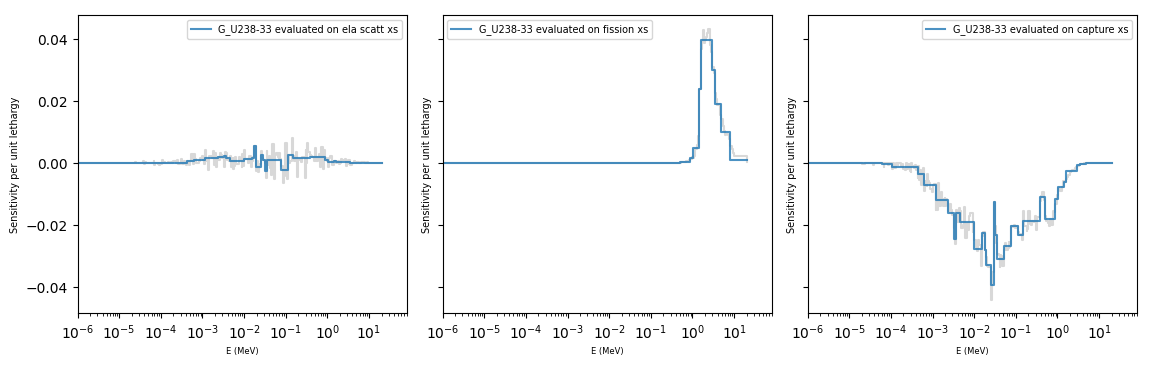

Best fitness: 0.00964676371014106
Best Chromosome: [np.int64(6), np.int64(34), np.int64(45), np.int64(67), np.int64(73), np.int64(83), np.int64(95), np.int64(100), np.int64(102), np.int64(105), np.int64(118), np.int64(125), np.int64(127), np.int64(128), np.int64(132), np.int64(134), np.int64(135), np.int64(137), np.int64(144), np.int64(151), np.int64(156), np.int64(161), np.int64(176), np.int64(180), np.int64(189), np.int64(191), np.int64(196), np.int64(197), np.int64(207), np.int64(209), np.int64(214), np.int64(221)]
Calculation is concluded


SystemExit: 

C:\Users\vcmolina\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:

# 3. Running the optimization
FREDS.run(
    ngen = 10, # ngen and seed variables can be defined by the user here, however, the defaults have been tuned
    seed = 3
)
#To use default values just do FREDS.run() (recommended option unless they didn't deliver satisfactory results in the first place)


Using one objective will default to the in-house GA for single objective optimization.

2. EXAMPLE WITH A MULTI-OBJECTIVE CASE FOR XGPT SENSITIVITIES: Number of Groups and FITNESS Function minimization

In [3]:
# 1. First, definition of the XGPT sensitivities we want to optimize for:

objective_0= XGPTSensitivity(filepath_xgpt   = "XGPT/U238/FC_Tf_1073_Tc_1073_sens0.m",
                              filepath_gpt    = "GPT/main_sens0.m",
                              filepath_eigfct = "XGPT/U238",
                              observable      = "keff",
                              zai             = 922380,  #w.r.t. U238
                              perts           = ["MT2", "MT18", "MT102"],
                              notation_dict   = notation_dict)

objective_1 = XGPTSensitivity(filepath_xgpt   = "XGPT/Pu239/FC_Tf_1073_Tc_1073_sens0.m",
                              filepath_gpt    = "GPT/main_sens0.m",
                              filepath_eigfct = "XGPT/Pu239",
                              observable      = "keff",
                              zai             = 942390, #w.r.t. Pu239
                              perts           = ["MT2", "MT18", "MT102"],
                              notation_dict   = notation_dict)


Now we set the problem context, let's see two subexamples, for the first objective function and minimizing the number of groups:

Optimizing for 2 objectives in total:
########################################################################
(1) Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']
(2) Minimizing number of groups
########################################################################

Two objective functions detected: Employing Algorithm NSGA-II
Optimization has started ...

########################################################################

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      500 |      4 |             - |             -
     2 |     1500 |      8 |  0.2500000000 |         ideal
     3 |     2500 |      8 |  0.0109015028 |         ideal
     4 |     3500 |      6 |  0.2857142857 |         ideal
     5 |     4500 |      6 |  0.0489444003 |             f
     6 |     5500 |      6 |  0.0011824618 |             f
     7 |     6500 |      7 |  0.0351348755 |             f
     8 |     7500 | 

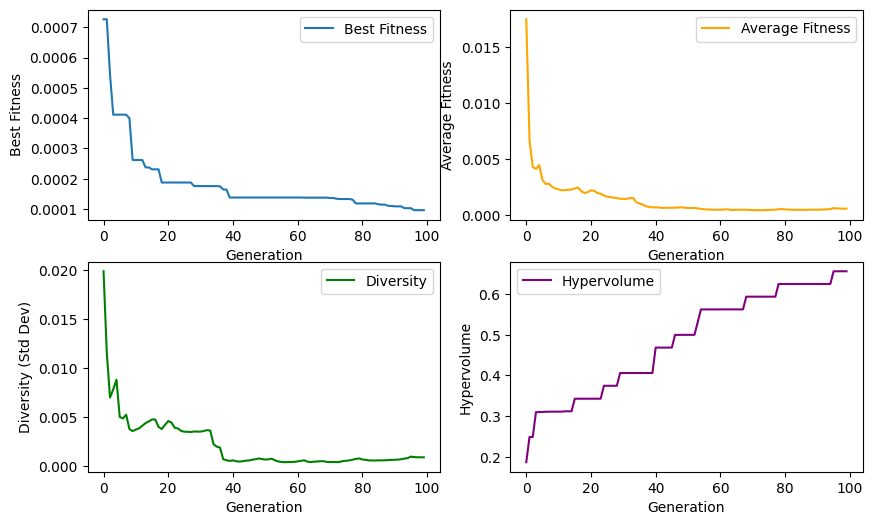


Optimization Results:

                          Energy Grid  Fitness_1  N_Groups
0   [31, 55, 65, 71, 80, 83, 85, 9...   0.000096      30.0
1   [31, 55, 65, 71, 80, 83, 85, 9...   0.000096      29.0
2   [19, 35, 55, 63, 70, 83, 93, 9...   0.000117      25.0
3   [39, 60, 65, 69, 78, 84, 96, 9...   0.000133      24.0
4   [17, 36, 36, 57, 70, 79, 83, 9...   0.000138      23.0
5   [35, 35, 36, 54, 71, 83, 92, 9...   0.000153      22.0
6   [19, 36, 36, 59, 69, 83, 97, 1...   0.000167      21.0
7   [36, 36, 36, 58, 69, 83, 92, 9...   0.000175      20.0
8   [36, 36, 36, 61, 71, 83, 98, 1...   0.000180      19.0
9   [36, 36, 36, 66, 66, 83, 97, 1...   0.000253      18.0
10  [36, 36, 36, 71, 83, 97, 107, ...   0.000344      17.0
11  [36, 36, 36, 71, 83, 97, 107, ...   0.000344      17.0
12  [36, 36, 36, 71, 83, 97, 107, ...   0.000344      17.0
13  [36, 36, 36, 36, 69, 83, 97, 1...   0.000445      16.0
14  [36, 36, 36, 67, 67, 82, 95, 1...   0.000574      15.0
15  [36, 36, 36, 36, 68, 81, 97,

In [9]:
FREDS.SetProblem(
    n_groups=33,  #Maximum number of groups
    sensitivities=([objective_0]),  # simultaneously optimize
    criteria='XGPT',
    optimize_groups=True,  #Making this True, will jointly minimize the defined fitness and the number of groups
)
#3. Run FREDS

FREDS.run()

Or for a three objective problem, optimizing for both objectives and for minimizing the number of groups:

In [20]:
FREDS.SetProblem(
    n_groups=33,  #Maximum number of groups
    sensitivities=([objective_0,objective_1]),  # simultaneously optimize
    criteria='XGPT',
    optimize_groups=True,  #Making this True, will jointly minimize the defined fitness and the number of groups
)
#3. Run FREDS

FREDS.run()

Optimizing for 3 objectives in total:
########################################################################
(1) Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']
(2) Sensitivity 1: optimizing  isotope 942390 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']
(3) Minimizing number of groups
########################################################################



If is a MOO case what we are running, we can save the results by doing:

In [11]:
#4. For multi-objective problems, we can save and print results
FREDS.save_results('results_demo.csv')  #filename for saving results in /results_FREDS
#if you don't choose a filename, a generic one will be generated

Results saved to ./result_FREDS\results_demo.csv


We can plot the pareto front result of the optimization


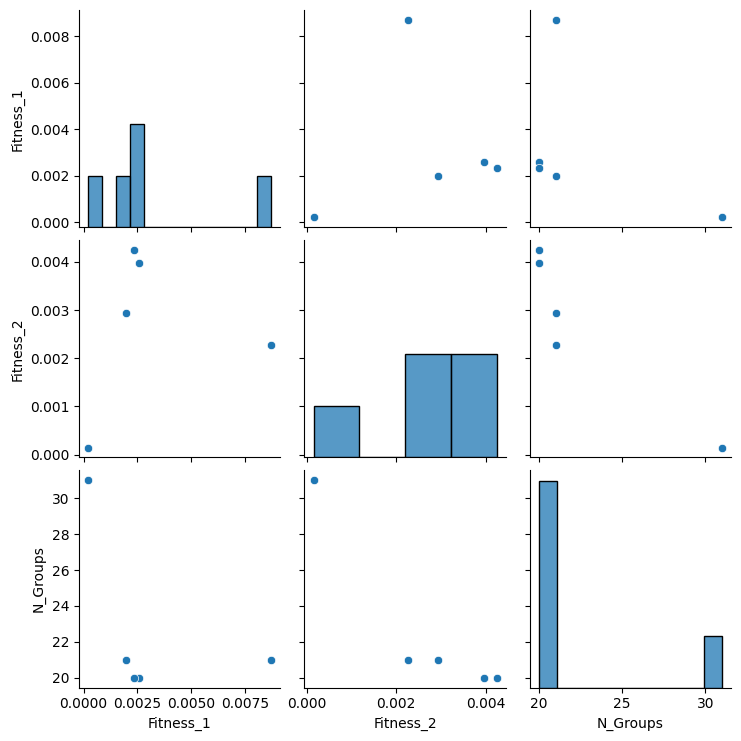

In [12]:
FREDS.plot_pareto_front()


We can plot the grids we are interested in by setting the index number of the results file
On the other hand, we can plot iteratively all the results by doing index='All'


Plotting Energy grid 0 for Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


TypeError: '<' not supported between instances of 'int' and 'str'

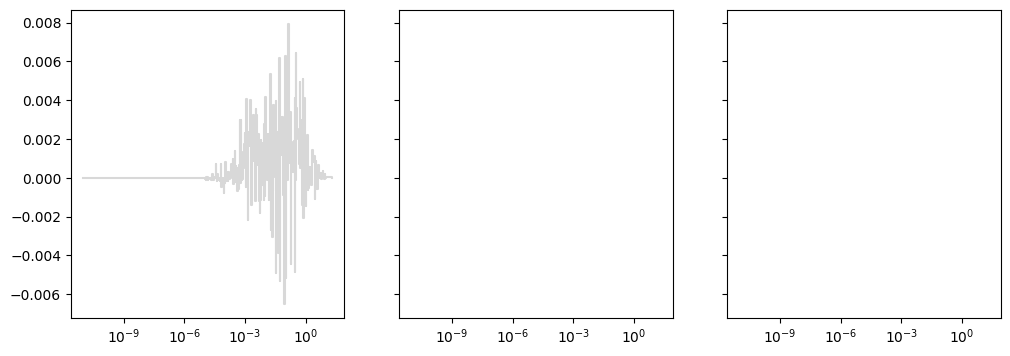

In [22]:
FREDS.plot_results(index = 0)

Plotting Energy grid 0 for Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


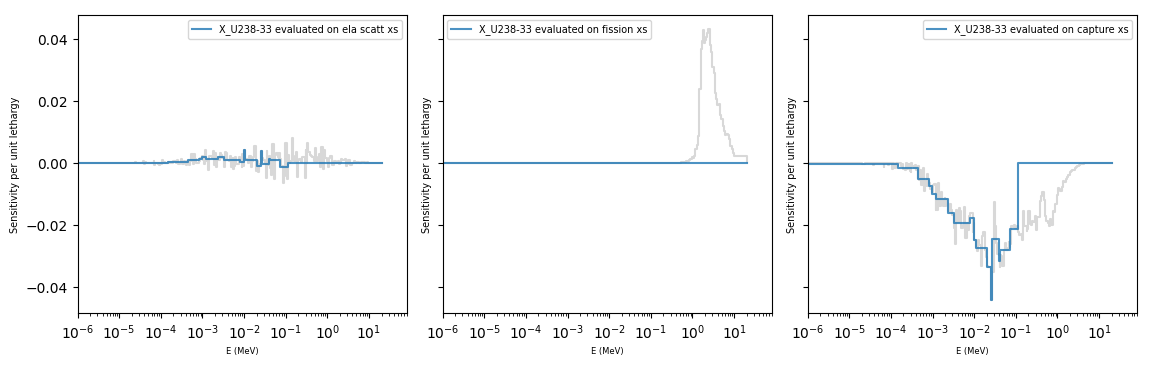

Plotting Energy grid 0 for Sensitivity 1: optimizing  isotope 942390 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


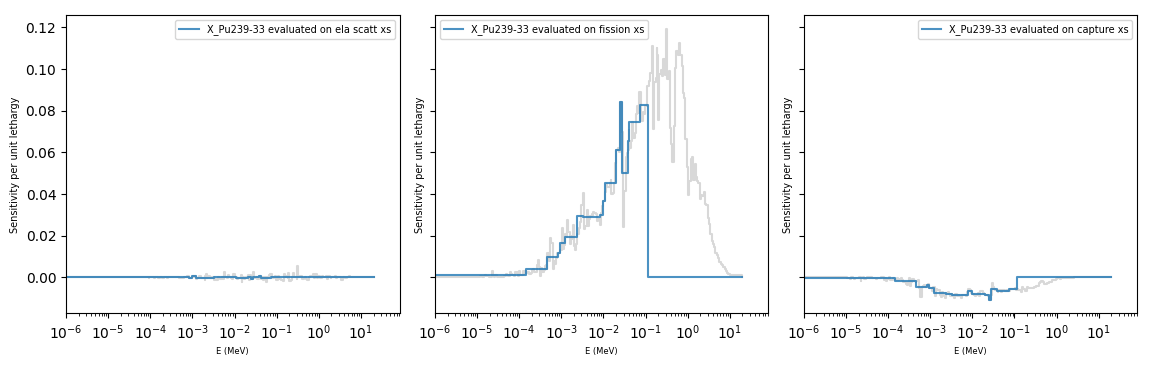

Plotting Energy grid 1 for Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


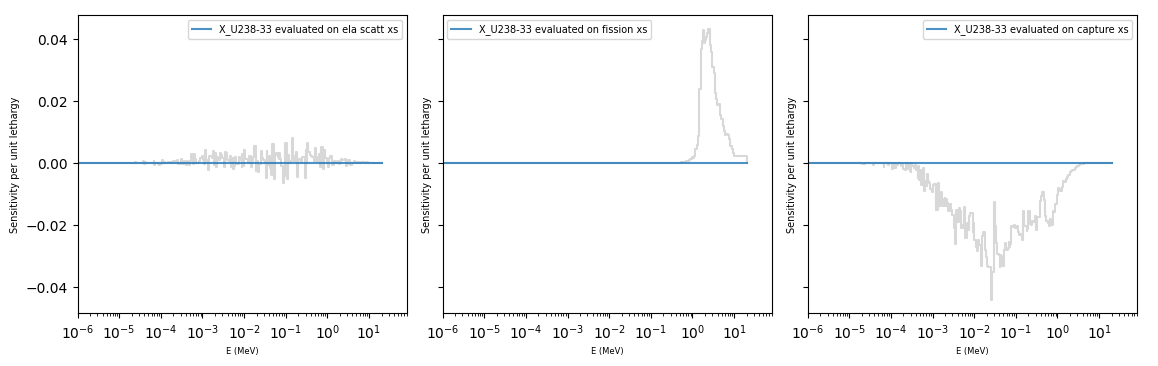

Plotting Energy grid 1 for Sensitivity 1: optimizing  isotope 942390 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


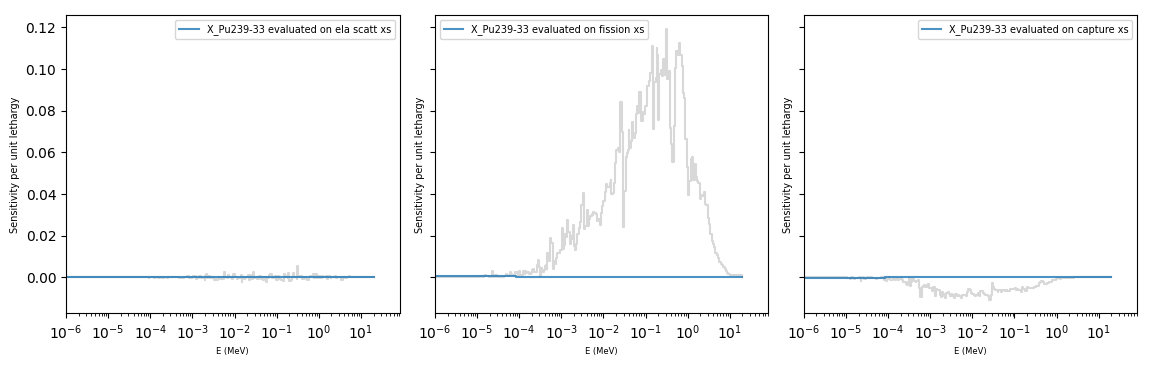

Plotting Energy grid 2 for Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


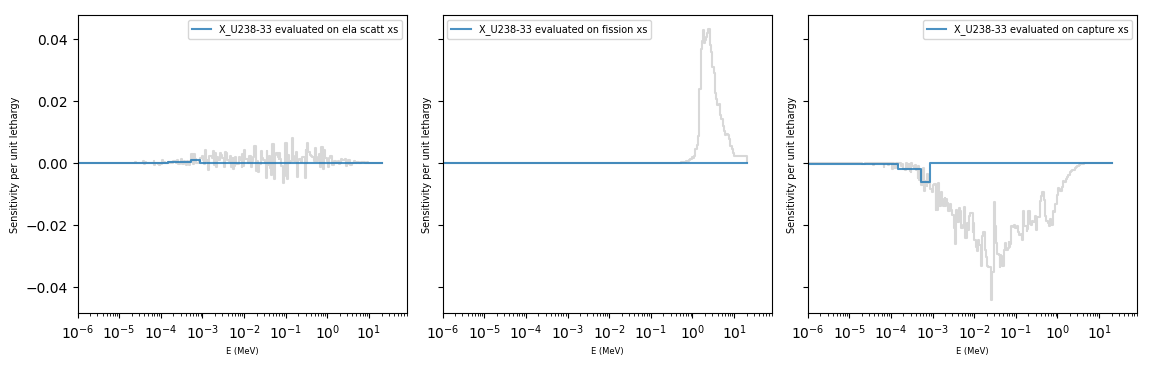

Plotting Energy grid 2 for Sensitivity 1: optimizing  isotope 942390 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


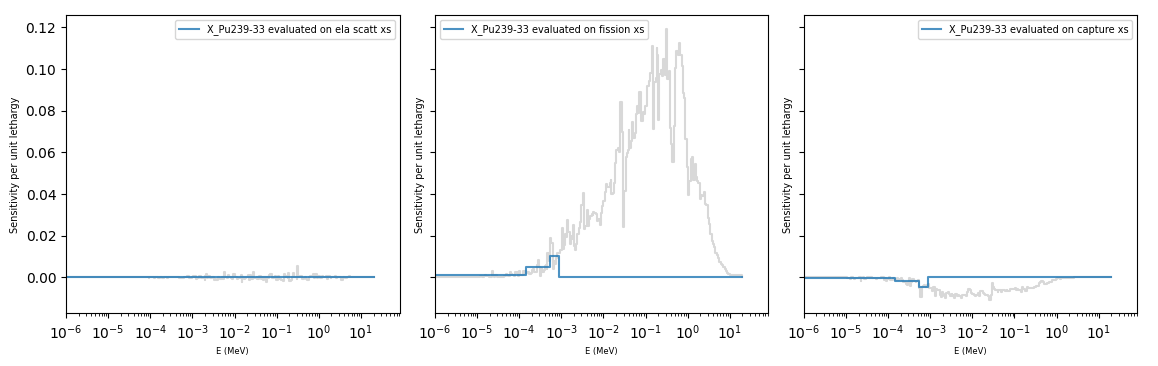

Plotting Energy grid 3 for Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


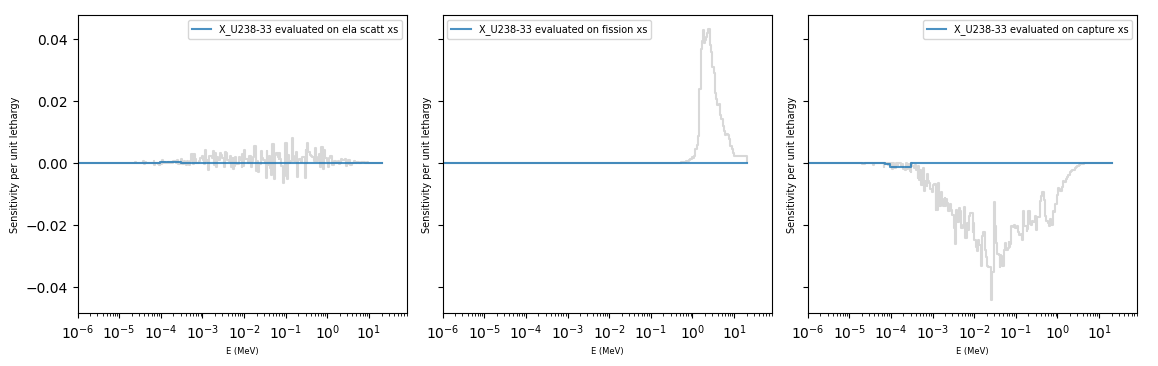

Plotting Energy grid 3 for Sensitivity 1: optimizing  isotope 942390 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


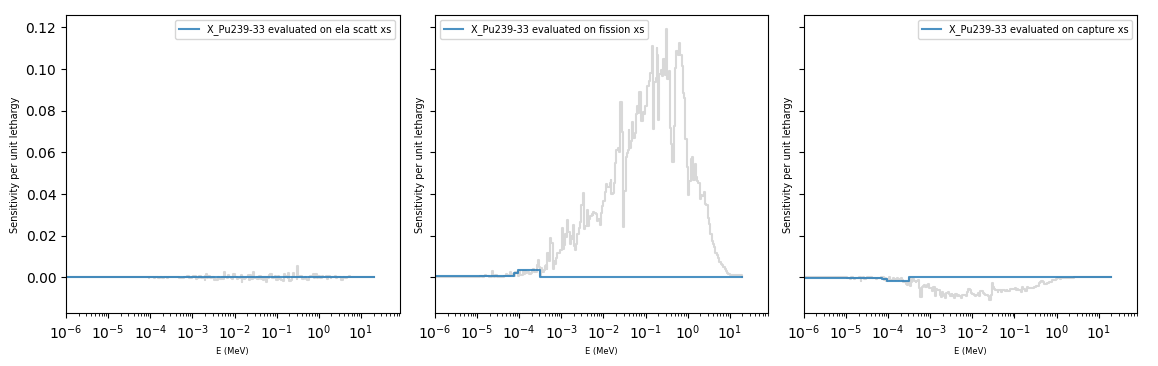

Plotting Energy grid 4 for Sensitivity 0: optimizing  isotope 922380 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


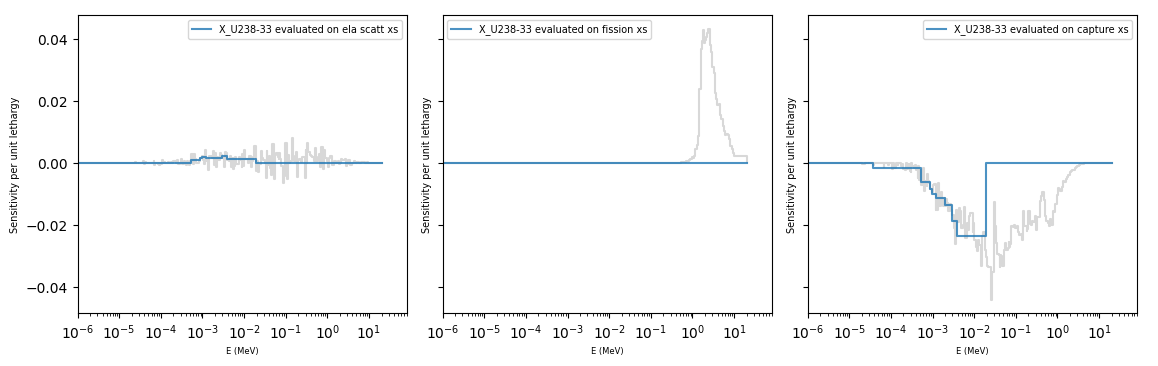

Plotting Energy grid 4 for Sensitivity 1: optimizing  isotope 942390 for observable keff in reactions:
['ela scatt xs', 'fission xs', 'capture xs']


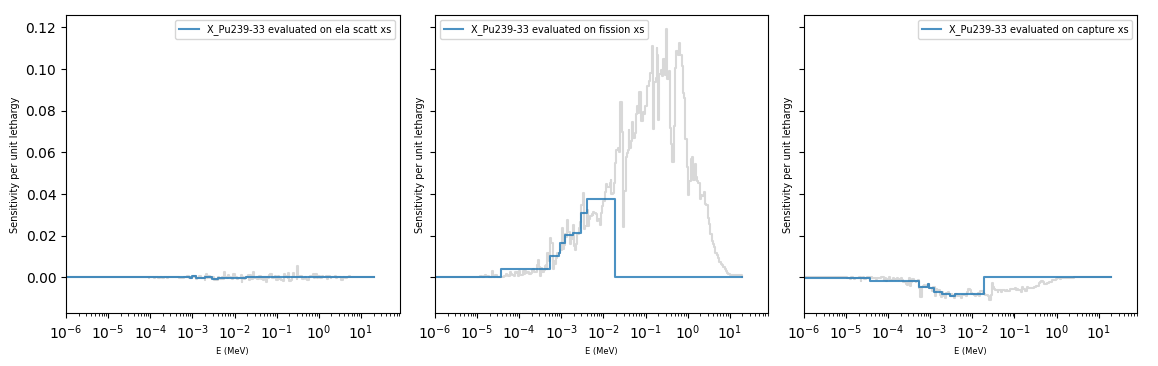

In [14]:
FREDS.plot_results(index = 'All')

Additionally, results can be loaded again to plot the pareto front

In [9]:
FREDS.load_results('result_FREDS/results_demo.csv')

Results loaded from file

Optimization Results:

                         Energy Grid  Fitness_1  Fitness_2  N_Groups
0  [50, 68, 78, 80, 84, 95, 100, ...   0.000207   0.000147      31.0
1  [1, 40, 40, 51, 78, 78, 79, 79...   0.008707   0.002264      21.0
2  [50, 71, 79, 79, 84, 91, 98, 1...   0.001991   0.002943      21.0
3  [38, 43, 62, 62, 62, 85, 98, 1...   0.002593   0.003964      20.0
4  [25, 71, 79, 80, 84, 91, 98, 1...   0.002322   0.004244      20.0


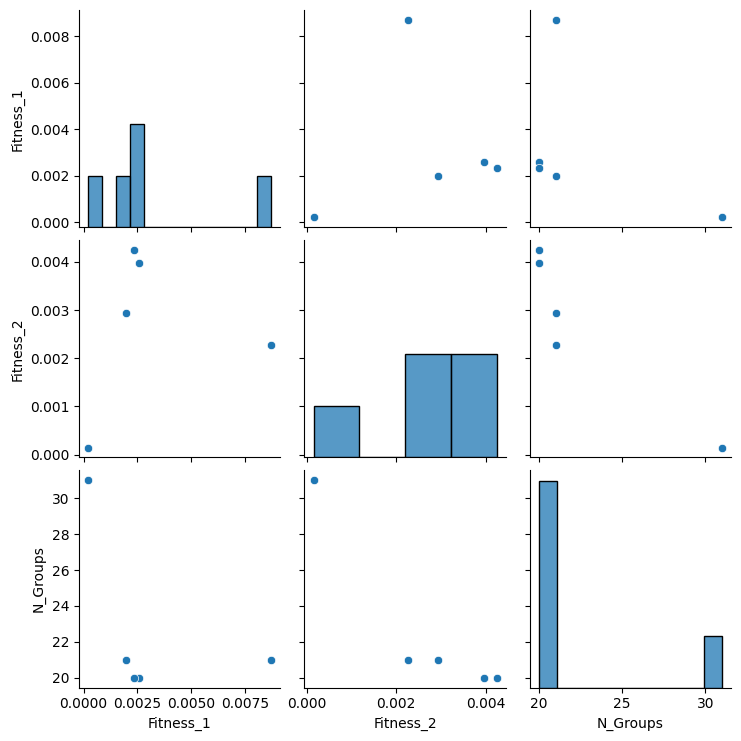

In [10]:
FREDS.plot_pareto_front()